# Relax Inc. Take-Home Challenge
* [1. Imports](#1)
* [2. Load data](#2)
* [3. Data wrangling](#3)
* [4. Explore the data](#4)
* [5. Summary](#5)

## 1. Imports<a id='1'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## 2 Load data<a id='2'></a>

In [2]:
data_dir = 'data/'
userinfo = pd.read_csv(data_dir + 'takehome_users.csv')
visits = pd.read_csv(data_dir + 'takehome_user_engagement.csv')

## 3 Data wrangling<a id='3'></a>

In [3]:
userinfo.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0


In [4]:
userinfo.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [5]:
visits.head(3)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1


In [6]:
visits.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

## 4. Explore the data<a id='4'></a>

### 4.1 Identify "adopted user"<a id='4.1'></a>

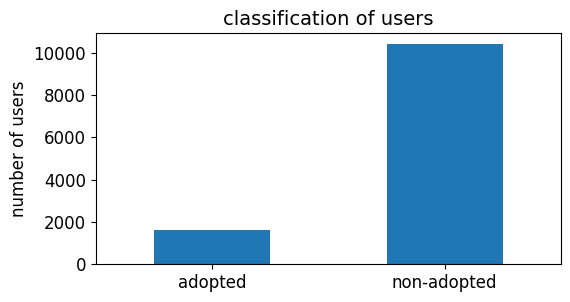

In [7]:
def IsAdoptedUser(timestamp):
    nstamp = len(timestamp)
    if nstamp < 3:
        return False
    for thisstamp in timestamp:
        stamp_tmp = [thisstamp]
        laststamp = thisstamp + timedelta(days=7)
        stamp_7day = timestamp[(timestamp>=thisstamp) & (timestamp<laststamp)]
        dates = []
        for i in stamp_7day:
            dates.append(i.strftime('%Y-%m-%d'))
        if len(set(dates)) >= 3:
            return True
    return False
        
userid = list(set(userinfo.object_id))
num_user = len(userid)
AdoptedUser = []
NonAdoptedUser = []
for uid in userid:
    timestamp = pd.to_datetime(visits[visits['user_id'] == uid].time_stamp)
    if IsAdoptedUser(timestamp):
        AdoptedUser.append(uid)
    else:
        NonAdoptedUser.append(uid)
    
fig = plt.figure(figsize=(6,3))
ax = plt.axes()
ax.set_xlim(0.5,2.5)
ax.set_xticks([1,2])
ax.set_xticklabels(['adopted', 'non-adopted'])
ax.tick_params(axis='both', labelsize=12)
ax.bar(np.arange(1,3),[len(AdoptedUser), len(NonAdoptedUser)], width=0.5)
# ax.tick_params(axis='x',rotation=25)
ax.set_ylabel('number of users',fontsize=12)
ax.set_title('classification of users',fontsize=14)
plt.show()

### 4.2 Identify relevant factors for user adoption<a id='4.2'></a>

#### Factor #1: Creation Source

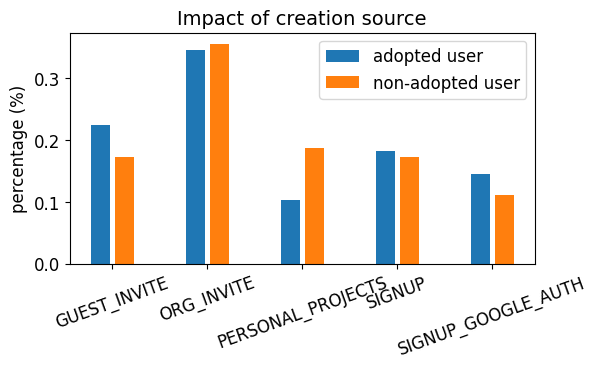

In [8]:
sourceList = list(set(userinfo.creation_source))
sourceList.sort()
num_sources = len(sourceList)
Adopted_sources = np.zeros(num_sources)
NonAdopted_sources = np.zeros(num_sources)
for user in AdoptedUser:
    usersource = userinfo[userinfo.object_id==user].creation_source.item()
    for i in range(num_sources):
        if usersource == sourceList[i]:
            Adopted_sources[i] += 1
Adopted_sources /= Adopted_sources.sum()
            
for user in NonAdoptedUser:
    usersource = userinfo[userinfo.object_id==user].creation_source.item()
    for i in range(num_sources):
        if usersource == sourceList[i]:
            NonAdopted_sources[i] += 1
NonAdopted_sources /= NonAdopted_sources.sum()


fig = plt.figure(figsize=(6,3))
ax = plt.axes()
# ax.set_xlim(0.5,2.5)
ax.set_xticks(np.arange(2.5,num_sources*4,4))
ax.set_xticklabels(sourceList)
ax.tick_params(axis='both', labelsize=12)
ax.bar(np.arange(2,num_sources*4,4),Adopted_sources)
ax.bar(np.arange(3,num_sources*4,4),NonAdopted_sources)
ax.tick_params(axis='x',rotation=20)
ax.set_ylabel('percentage (%)',fontsize=12)
ax.legend(['adopted user','non-adopted user'],fontsize=12,loc='upper right')
ax.set_title('Impact of creation source',fontsize=14)
# plt.show()
plt.savefig('figure/Relax_Fig1.png', bbox_inches='tight')

#### Factor #2: Opted in mailing list

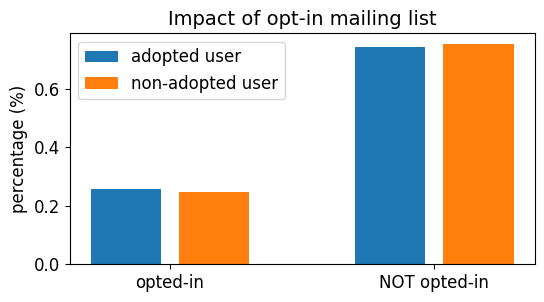

In [9]:
Adopted_mail = np.zeros(2)
NonAdopted_mail = np.zeros(2)
for user in AdoptedUser:
    mail = userinfo[userinfo.object_id==user].opted_in_to_mailing_list.item()
    if mail:
        Adopted_mail[0] += 1
    else:
        Adopted_mail[1] += 1
Adopted_mail /= Adopted_mail.sum()
            
for user in NonAdoptedUser:
    mail = userinfo[userinfo.object_id==user].opted_in_to_mailing_list.item()
    if mail:
        NonAdopted_mail[0] += 1
    else:
        NonAdopted_mail[1] += 1
NonAdopted_mail /= NonAdopted_mail.sum()


fig = plt.figure(figsize=(6,3))
ax = plt.axes()
ax.set_xticks(np.arange(2.5,2*3,3))
ax.set_xticklabels(['opted-in', 'NOT opted-in'])
ax.tick_params(axis='both', labelsize=12)
ax.bar(np.arange(2,2*3,3),Adopted_mail)
ax.bar(np.arange(3,2*3+1,3),NonAdopted_mail)
ax.tick_params(axis='x',rotation=0)
ax.set_ylabel('percentage (%)',fontsize=12)
ax.legend(['adopted user','non-adopted user'],fontsize=12,loc='upper left')
ax.set_title('Impact of opt-in mailing list',fontsize=14)
# plt.show()
plt.savefig('figure/Relax_Fig2.png', bbox_inches='tight')

#### Factor #3: Enable the marketing email drip

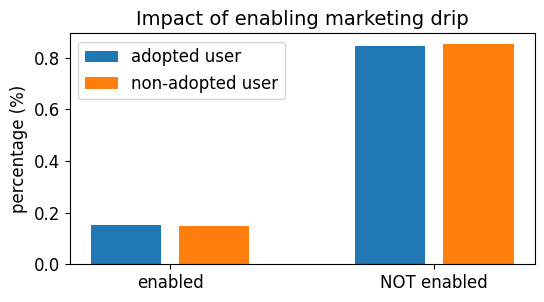

In [10]:
Adopted_drip = np.zeros(2)
NonAdopted_drip = np.zeros(2)
for user in AdoptedUser:
    drip = userinfo[userinfo.object_id==user].enabled_for_marketing_drip.item()
    if drip:
        Adopted_drip[0] += 1
    else:
        Adopted_drip[1] += 1
Adopted_drip /= Adopted_drip.sum()
            
for user in NonAdoptedUser:
    drip = userinfo[userinfo.object_id==user].enabled_for_marketing_drip.item()
    if drip:
        NonAdopted_drip[0] += 1
    else:
        NonAdopted_drip[1] += 1
NonAdopted_drip /= NonAdopted_drip.sum()


fig = plt.figure(figsize=(6,3))
ax = plt.axes()
ax.set_xticks(np.arange(2.5,2*3,3))
ax.set_xticklabels(['enabled', 'NOT enabled'])
ax.tick_params(axis='both', labelsize=12)
ax.bar(np.arange(2,2*3,3),Adopted_drip)
ax.bar(np.arange(3,2*3+1,3),NonAdopted_drip)
ax.tick_params(axis='x',rotation=0)
ax.set_ylabel('percentage (%)',fontsize=12)
ax.legend(['adopted user','non-adopted user'],fontsize=12,loc='upper left')
ax.set_title('Impact of enabling marketing drip',fontsize=14)
# plt.show()
plt.savefig('figure/Relax_Fig3.png', bbox_inches='tight')

#### Factor #4: Invited by another user

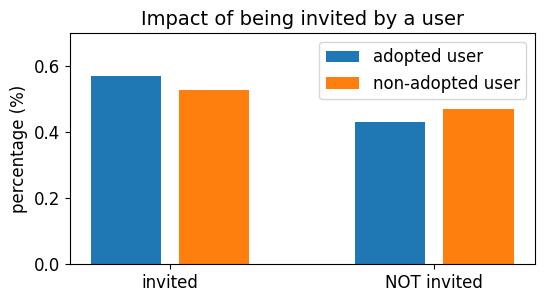

In [11]:
Adopted_invite = np.zeros(2)
NonAdopted_invite = np.zeros(2)
userList = list(set(userinfo.object_id))
for user in AdoptedUser:
    invite = userinfo[userinfo.object_id==user].invited_by_user_id.item()
    if invite in userList:
        Adopted_invite[0] += 1
    else:
        Adopted_invite[1] += 1
Adopted_invite /= Adopted_invite.sum()
            
for user in NonAdoptedUser:
    invite = userinfo[userinfo.object_id==user].invited_by_user_id.item()
    if invite in userList:
        NonAdopted_invite[0] += 1
    else:
        NonAdopted_invite[1] += 1
NonAdopted_invite /= NonAdopted_invite.sum()


fig = plt.figure(figsize=(6,3))
ax = plt.axes()
ax.set_ylim(0, 0.7)
ax.bar(np.arange(2,2*3,3),Adopted_invite)
ax.bar(np.arange(3,2*3+1,3),NonAdopted_invite)
ax.set_xticks(np.arange(2.5,2*3,3))
ax.set_xticklabels(['invited', 'NOT invited'])
ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x',rotation=0)
ax.set_ylabel('percentage (%)',fontsize=12)
ax.legend(['adopted user','non-adopted user'],fontsize=12,loc='upper right')
ax.set_title('Impact of being invited by a user',fontsize=14)
# plt.show()
plt.savefig('figure/Relax_Fig4.png', bbox_inches='tight')